International Airline Passengers dataset, datos totales mensuales en miles desde Enero 1949 a Diciembre 1960.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True) #que sea de tipo fecha el indice

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


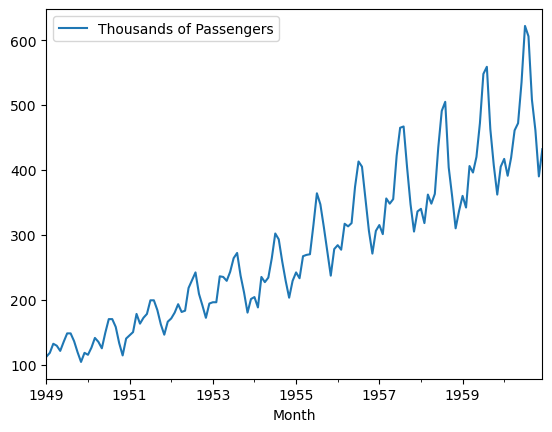

In [4]:
airline.plot();

# tendencia por encima de lineal - puede ser exponencial
# mejor separamos los componentes porque tambien hay estacionalidad clara

Podemos identificar si una serie es descomponible aditiva o multiplicativamente a partir de su variación. Si la magnitud de la componente de estacionalidad cambia con el tiempo, la serie es multiplicativa, en cualquier otro caso, es aditiva.

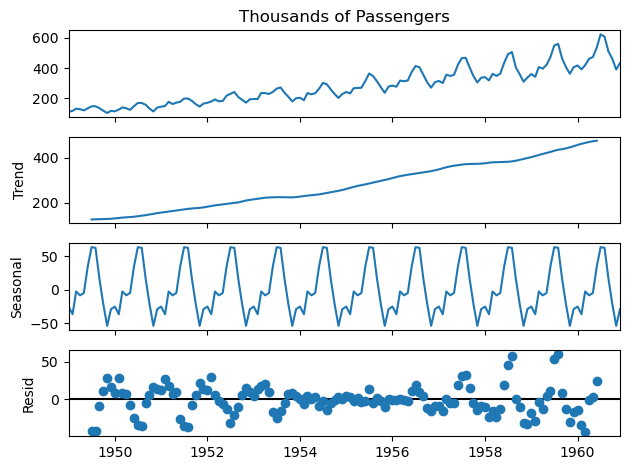

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')  
result.plot();

# estacionalidad - se obtiene restando la tendencia a la serie original
# residual - lo que no se explica ni por la tendencia ni por la estacionalidad (cualquier error que no lo explique lo anterior)
# el efecto residual siempre parece ruido, pero nos sirve para indicar donde esta m+as limpia y donde hay más tuido
# por jemplo al principio y al final estan más "sucios" los datos

# el modelo aditivo se usa cuando estemos seguros que la tendencia es lineal, sino, se usa el multiplicativo
# por ejempo cada año se suman 100k pasajeros

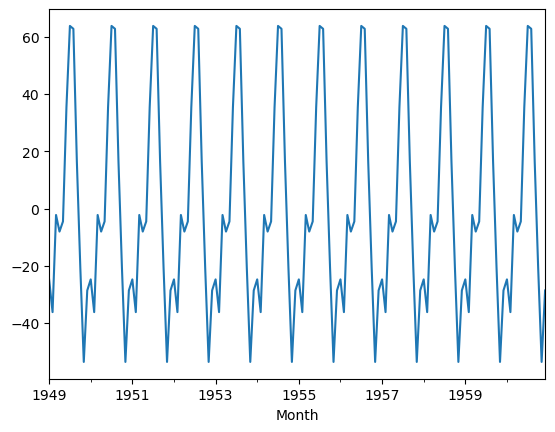

In [6]:
result.seasonal.plot();

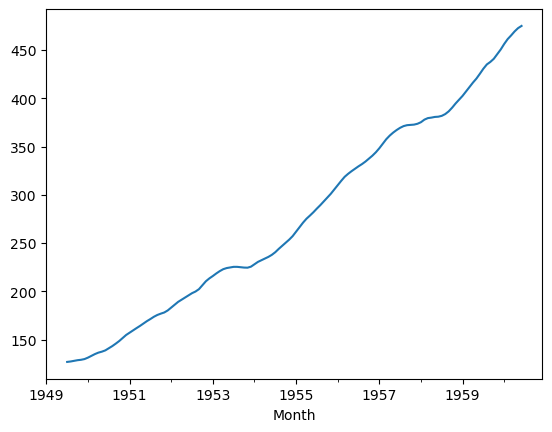

In [7]:
result.trend.plot();

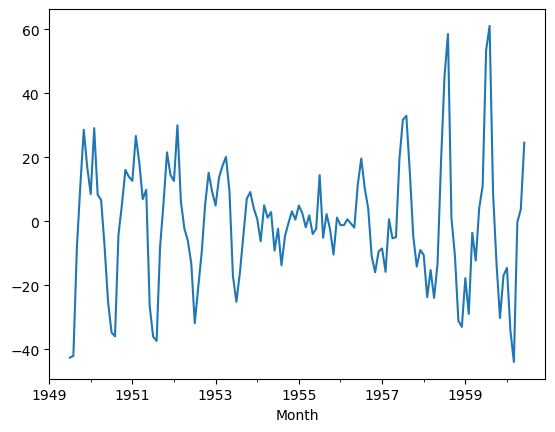

In [8]:
result.resid.plot();

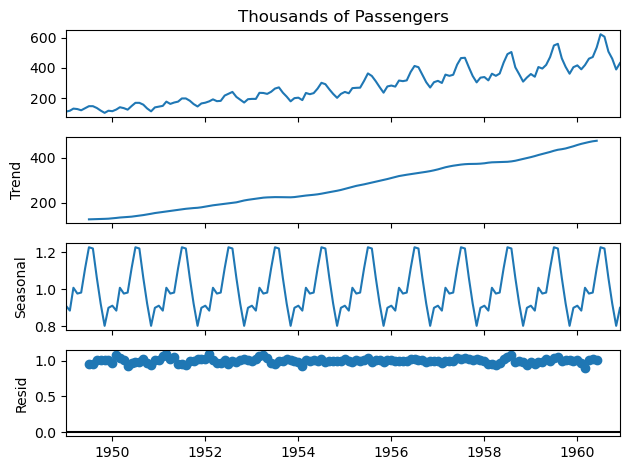

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  
result.plot();

# El multiplicativo tiene más sentido cuando la tasa es no lineal, por ejemplo se duplica los pasajeros cada año - exponencial

Vemos que cambia mucho la escala del residuo, pasando a una escala entre -1 y 1 es buen indicador de una descomposición apropiada

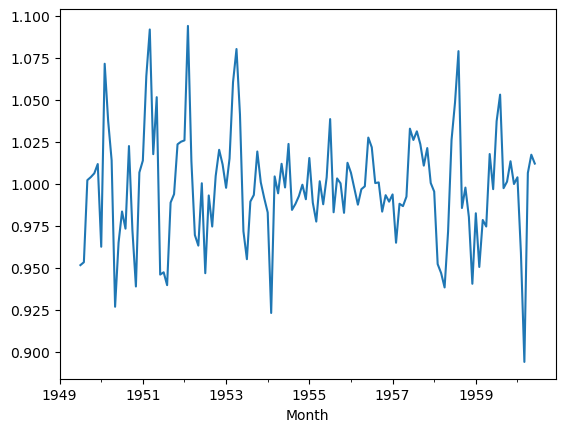

In [10]:
result.resid.plot();

In [11]:
import statsmodels.tsa.stattools as sts 
sts.adfuller(airline)

# Obviamente no es estacionaria

(0.815368879206051,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

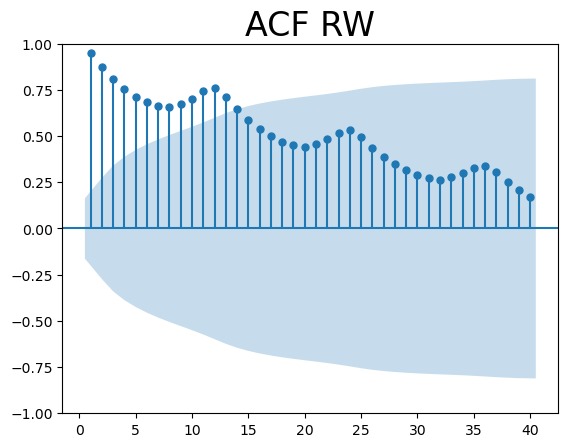

In [12]:
import statsmodels.graphics.tsaplots as sgt 
import matplotlib.pyplot as plt 
# Cada punto es un mes, la estacionaliadad son 12 puntos, a partir de un año ya no es significativo

sgt.plot_acf(airline, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

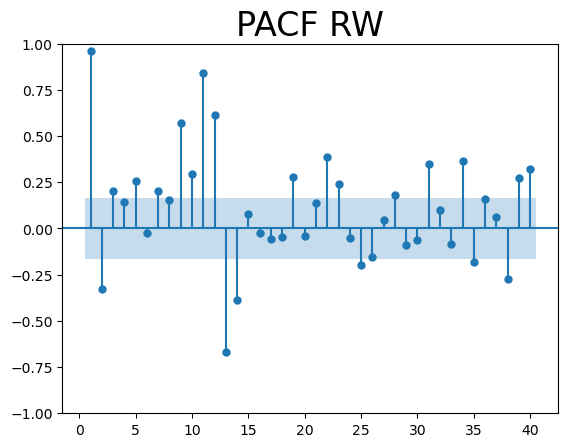

In [13]:
sgt.plot_pacf(airline, lags = 40, zero = False, method = 'ols')
plt.title("PACF RW", size = 24)
plt.show()